In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

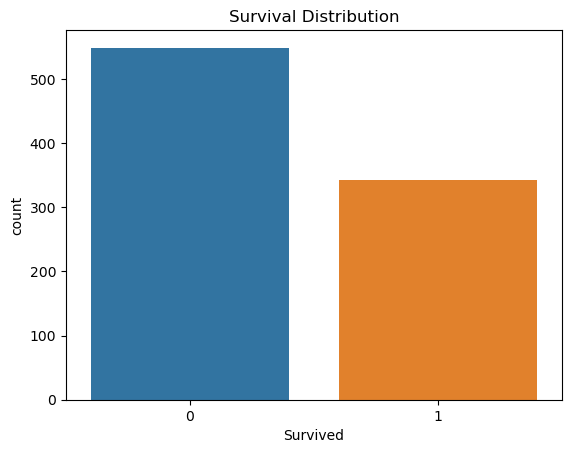

In [6]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.show()

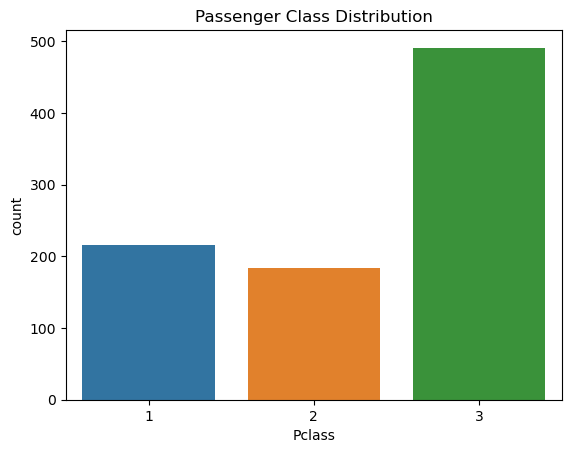

In [7]:
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

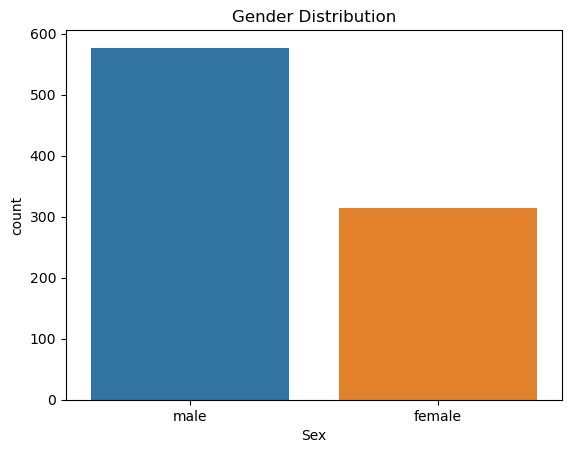

In [8]:
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.show()

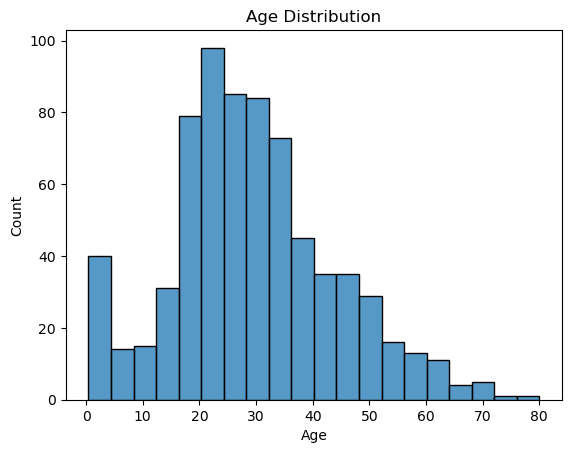

In [9]:
sns.histplot(x='Age', data=df, bins=20)
plt.title('Age Distribution')
plt.show()

/tmp/ipykernel_257/2298098936.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


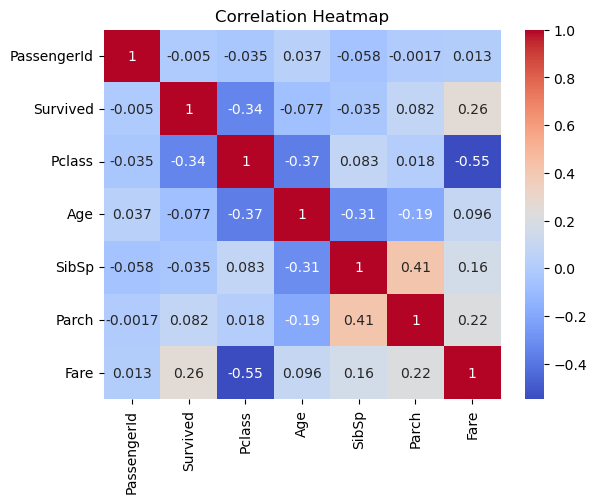

In [10]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
name_parts = df['Name'].str.split(',', n=1, expand=True)
name_parts.columns = ['Name1', 'Name2']
df = pd.concat([df, name_parts], axis=1)
df.drop('Name', axis=1, inplace=True)

In [12]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name1,Name2
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


In [13]:
df['Name1'].value_counts()

Andersson    9
Sage         7
Panula       6
Skoog        6
Carter       6
            ..
Hanna        1
Lewy         1
Mineff       1
Haas         1
Dooley       1
Name: Name1, Length: 667, dtype: int64

In [14]:
name1_counts = df['Name1'].value_counts()
name1_values_more_than_5 = name1_counts[name1_counts > 5].index.tolist()

print(name1_values_more_than_5)

['Andersson', 'Sage', 'Panula', 'Skoog', 'Carter', 'Goodwin', 'Johnson']


In [15]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Name1            0
Name2            0
dtype: int64


# Handling Missing Data

### Age values imputation...

In [16]:
# Group by 'Pclass' and 'Sex', calculate the mean age for each group
age_group_means = df.groupby(['Pclass', 'Sex'])['Age'].mean()

# Iterate through the groups and impute mean age for missing values
for index, row in df.iterrows():
    if pd.isnull(row['Age']):
        df.loc[index, 'Age'] = age_group_means[row['Pclass'], row['Sex']]
df['Age'] = df['Age'].astype(int)

# Verify if missing values are imputed
missing_values_after_impute = df.isnull().sum()
print(missing_values_after_impute['Age'])

0


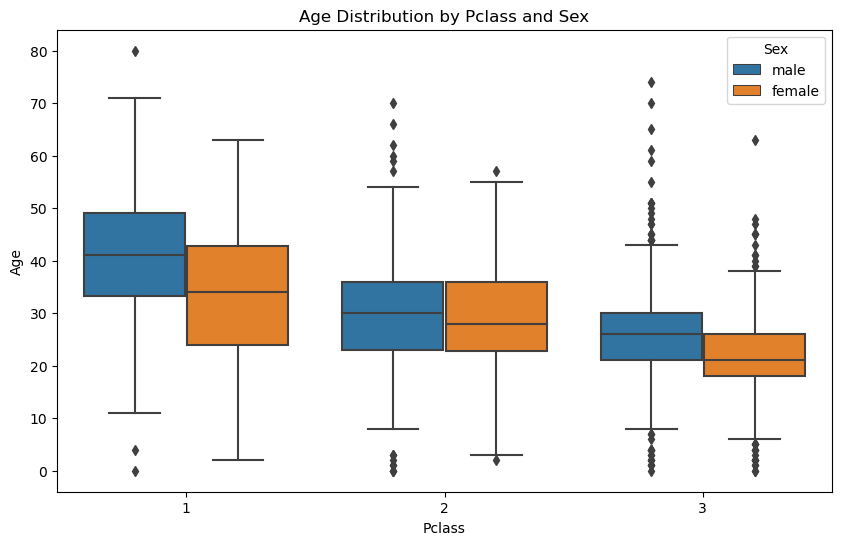

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to visualize age distribution within each group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=df)
plt.title('Age Distribution by Pclass and Sex')
plt.show()

## Missing Data in Cabin !

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Create a dataframe with non-missing Cabin values
cabin_known = df.dropna(subset=['Cabin'])

# Features and target for training the classifier
X_train = cabin_known[['Fare', 'Pclass']]
y_train = cabin_known['Cabin']

# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict missing Cabin values
missing_cabin_indices = df[df['Cabin'].isnull()].index
X_missing = df.loc[missing_cabin_indices, ['Fare', 'Pclass']]
predicted_cabins = clf.predict(X_missing)

# Impute the missing Cabin values
df.loc[missing_cabin_indices, 'Cabin'] = predicted_cabins

In [19]:
# Verify if missing values are imputed in Cabin column.
missing_values_after_impute = df.isnull().sum()
print(missing_values_after_impute['Cabin'])

0


## 2 records have missing values in Embarked Column

In [20]:
# Calculate the mode of the 'Embarked' column
embarked_mode = df['Embarked'].mode()[0]

# Impute missing values with the mode value
df['Embarked'].fillna(embarked_mode, inplace=True)

# Verify if missing values are imputed
missing_values_after_impute = df.isnull().sum()
print(missing_values_after_impute['Embarked'])

0


# Label Encoding for Categorical Columns !

In [21]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder instance
label_encoder = LabelEncoder()

# Apply label encoding to 'Sex', 'Cabin', and 'Embarked' columns
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Cabin'] = label_encoder.fit_transform(df['Cabin'].astype(str))
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
df['Name1'] = label_encoder.fit_transform(df['Name1'])

# Display the modified dataframe
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name1,Name2
0,1,0,3,1,22,1,0,A/5 21171,7.2500,140,2,73,Mr. Owen Harris
1,2,1,1,0,38,1,0,PC 17599,71.2833,81,0,136,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,0,26,0,0,STON/O2. 3101282,7.9250,115,2,251,Miss. Laina
3,4,1,1,0,35,1,0,113803,53.1000,55,2,198,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,1,35,0,0,373450,8.0500,115,2,11,Mr. William Henry


# Modelling !!!

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

# Select the specified columns
selected_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']
df = df[selected_columns]

# Split data into features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# List of models to evaluate
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('LightGBM', LGBMClassifier(random_state=42)),
    ('Support Vector Machine', SVC(probability=True, random_state=42))  # Enable probability estimation
]

# Evaluate each model
for name, model in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        (name, model)
    ])
    
    # Perform GridSearchCV for hyperparameter tuning
    parameters = {}
    if name == 'Logistic Regression':
        parameters = {'Logistic Regression__C': [0.1, 1, 10]}
    elif name == 'Decision Tree':
        parameters = {'Decision Tree__max_depth': [None, 5, 10]}
    elif name == 'Random Forest':
        parameters = {'Random Forest__n_estimators': [100, 200, 300]}
    elif name == 'Gradient Boosting':
        parameters = {'Gradient Boosting__n_estimators': [50, 100, 150]}
    
    grid_search = GridSearchCV(pipeline, parameters, cv=5)
    grid_search.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate additional evaluation metrics
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, grid_search.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)
    precision, recall, _ = precision_recall_curve(y_test, grid_search.predict_proba(X_test)[:,1])
    avg_precision = average_precision_score(y_test, grid_search.predict_proba(X_test)[:,1])
    
    print(f'{name}:')
    print(f'Accuracy = {accuracy:.4f}')
    print('Classification Report:\n', report)
    print('Confusion Matrix:\n', confusion)
    print(f'ROC AUC = {roc_auc:.4f}')
    print(f'Average Precision = {avg_precision:.4f}')
    print()


Logistic Regression:
Accuracy = 0.8156
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179

Confusion Matrix:
 [[91 14]
 [19 55]]
ROC AUC = 0.8838
Average Precision = 0.8793

Decision Tree:
Accuracy = 0.8045
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.92      0.85       105
           1       0.85      0.64      0.73        74

    accuracy                           0.80       179
   macro avg       0.82      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179

Confusion Matrix:
 [[97  8]
 [27 47]]
ROC AUC = 0.8629
Average Precision = 0.8003

Random Forest:
Accuracy = 0.8156
Classification Report:
    

# Model Summary

Summary of the evaluation results for the Titanic survival prediction models, highlighting the top 5 models:

| Model                | Accuracy | ROC AUC | Avg Precision | Precision (Class 1) | Recall (Class 1) |
|----------------------|----------|---------|---------------|---------------------|------------------|
| Gradient Boosting    | 0.8380   | 0.8835  | 0.8655        | 0.85                | 0.74             |
| Random Forest        | 0.8156   | 0.9019  | 0.8391        | 0.78                | 0.77             |
| LightGBM             | 0.8268   | 0.8894  | 0.8631        | 0.78                | 0.81             |
| Support Vector Machine | 0.8156 | 0.8754  | 0.8495        | 0.81                | 0.73             |
| Logistic Regression  | 0.8156   | 0.8838  | 0.8793        | 0.80                | 0.74             |


**Conclusion :**

Based on the evaluation of various classification models for predicting Titanic survival, the **Gradient Boosting** model appears to be the most promising choice. 

It achieves the highest accuracy and relatively high ROC AUC and average precision scores. 

Furthermore, its precision and recall values for class 1 (survived) are well-balanced, indicating a good trade-off between correctly identifying survivors and minimizing false positives.